In [1]:
import librosa
import torchaudio
import torch
import numpy as np
import matplotlib.pyplot as plt
from speechbrain.pretrained import EncoderClassifier

encoder = EncoderClassifier.from_hparams(source="speechbrain/spkrec-ecapa-voxceleb")

/work/dpandya/miniconda3/envs/irsolve/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/work/dpandya/miniconda3/envs/irsolve/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN3c104cuda20CUDACachingAllocator9allocatorE'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [9]:
from speechbrain.processing import diarization as diar
import seaborn as sns

audio_file = 'Signals/Bdb001/Bdb001.interaction.wav'

aud, sr = librosa.load(audio_file,sr=16000)
t_30 = 370*sr
aud_mfcc = librosa.feature.mfcc(y=aud[t_30:(t_30+30*sr)], sr=sr, n_mfcc=15)
aud_ton = librosa.feature.tonnetz(y=aud[t_30:(t_30+30*sr)],sr=sr)

embedding0 = encoder.encode_batch(torch.from_numpy(aud[t_30:(t_30+30*sr)]))
#preds = encoder.classify_batch(torch.from_numpy(aud[t_30:(t_30+30*sr)]))
preds = encoder.classify_batch(torch.from_numpy(aud[t_30:(t_30+300*sr)]))


#diar.do_spec_clustering(diary_obj=embedding0, out_rttm_file='out.rttm', k=None, pval=1.0, affinity_type='cos', rec_id='00',n_neighbors=0)

#sns.displot(aud_mfcc[0])
#plt.plot([i for i in range(0,len(aud[t_30:(t_30+30*sr)]))], aud[t_30:(t_30+30*sr)])


In [10]:
preds

(tensor([[-0.0845,  0.0500, -0.0557,  ..., -0.0039, -0.0087, -0.0121]]),
 tensor([0.5254]),
 tensor([464]),
 ['id02873'])

<Axes: >

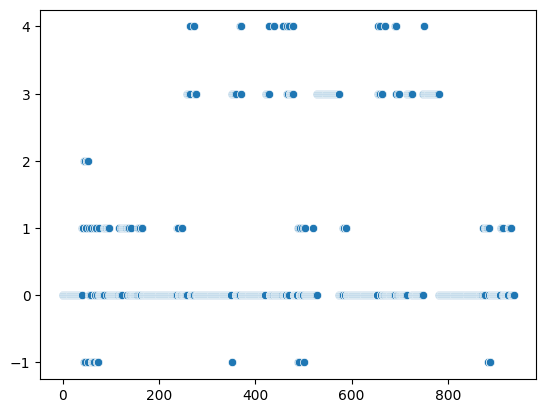

In [144]:
from sklearn.cluster import SpectralClustering, DBSCAN, OPTICS

db_scan = DBSCAN(eps=3,min_samples=5)
optic_obj = OPTICS(min_samples=1)

preds = db_scan.fit_predict(aud_mfcc[0].reshape(-1,1))

sns.scatterplot(preds)
#print(preds)

In [145]:
#t_30 = sr*30
#t_40 = sr*10

#embedding0 = encoder.encode_batch(torch.from_numpy(aud[46*t_30 : (48*t_30)]))
#embedding1 = encoder.encode_batch(torch.from_numpy(aud[0:(t_40)]))
embedding0 = encoder.encode_batch(torch.from_numpy(aud[t_30:(t_30+30*sr)]))

print(embedding0.shape)

torch.Size([1, 1, 192])


/work/dpandya/miniconda3/envs/irsolve/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:420: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  est = KMeans(
/tmp/ipykernel_3207523/908394921.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding0.squeeze().squeeze().numpy(), clusters_preds, cmap = 'RdBu')


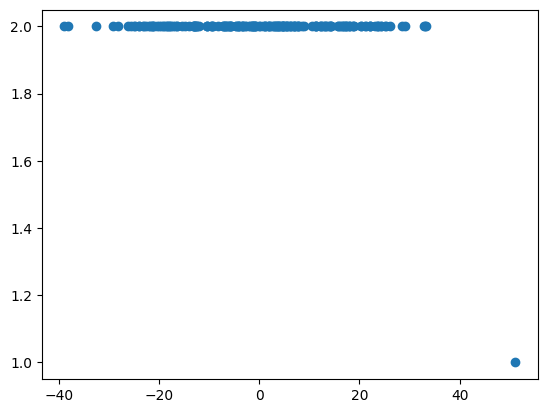

In [146]:
from sklearn.cluster import SpectralClustering

cluster_obj = SpectralClustering(n_clusters=3)
clusters_preds = cluster_obj.fit_predict(embedding0.squeeze().numpy().reshape(-1,1))

plt.scatter(embedding0.squeeze().squeeze().numpy(), clusters_preds, cmap = 'RdBu')

In [90]:
import torchaudio.functional as F
aud_tensor = torch.from_numpy(aud[t_30:(t_30+30*sr)]).unsqueeze(0)

pitch = F.detect_pitch_frequency(aud_tensor, sr)
chroma = librosa.feature.chroma_stft(y=aud[t_30:(t_30+30*sr)])

print(chroma.shape)

(12, 938)


torch.Size([1, 2985])
tensor(1151.6703) tensor(86.0215)


<Axes: >

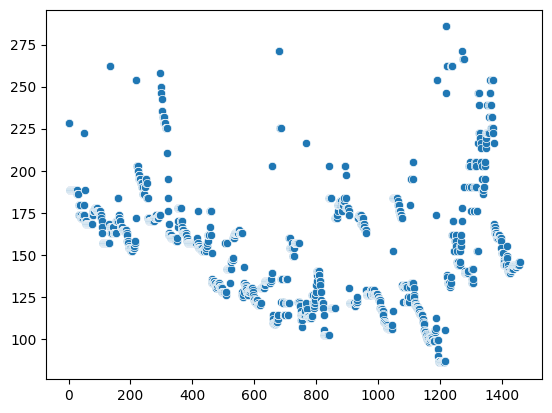

In [97]:
print(pitch.shape)
print(torch.mean(pitch), torch.min(pitch))

ll = []
for i in pitch.squeeze().numpy():
    if i<300:
        ll.append(i) 

sns.scatterplot(ll)


In [98]:
import numpy as np

'''for i in range(0, chroma.shape[0],3):
    #print(i.shape)
    #print(np.mean(aud_ton[i]), np.std(aud_ton[i]))
    #sns.scatterplot(chroma[i])
    sns.displot(chroma[i])'''

'for i in range(0, chroma.shape[0],3):\n    #print(i.shape)\n    #print(np.mean(aud_ton[i]), np.std(aud_ton[i]))\n    #sns.scatterplot(chroma[i])\n    sns.displot(chroma[i])'

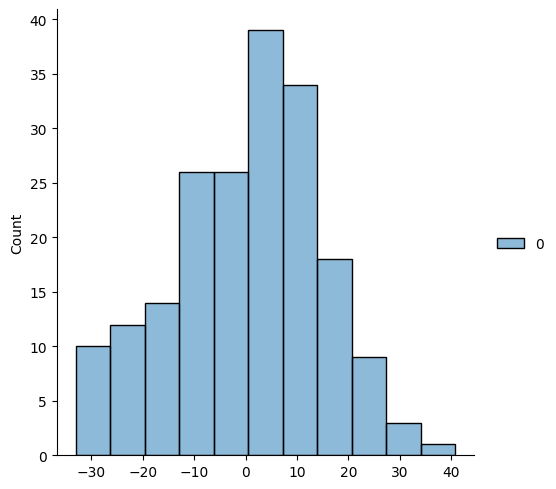

In [12]:
sns.displot(embedding0.squeeze().numpy().reshape(-1,1))

<Axes: >

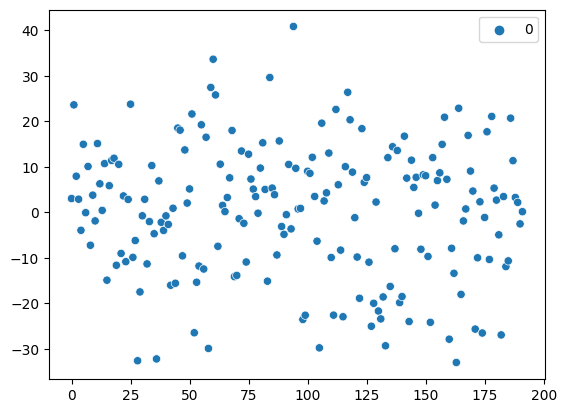

In [13]:
sns.scatterplot(embedding0.squeeze().numpy().reshape(-1,1))

In [30]:


cluster_obj = SpectralClustering(n_clusters=6)
db_scan_obj = DBSCAN(eps=2,min_samples=1)
optics_obj = OPTICS(min_samples=3)

clusters = cluster_obj.fit((embedding0.squeeze().numpy().reshape(-1,1)))
#clusters_dbscan = db_scan_obj.fit((embedding0.squeeze().numpy().reshape(-1,1)))
clusters_optics_preds = optics_obj.fit((embedding0.squeeze().numpy().reshape(-1,1)))

/tmp/ipykernel_3207523/2958522260.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding0.squeeze().squeeze().numpy(), optics_preds.labels_, cmap = 'RdBu')


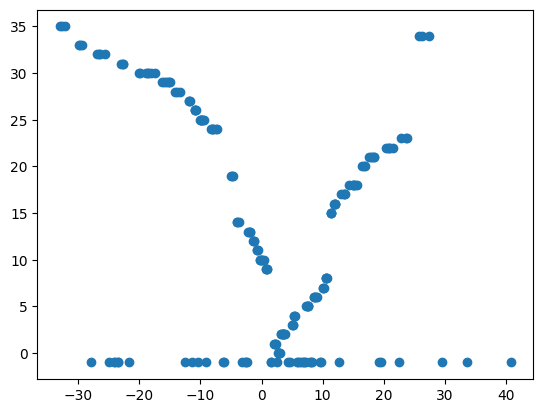

In [31]:
clusters_preds = cluster_obj.fit_predict(embedding0.squeeze().numpy().reshape(-1,1))
#clusters_dbscan = db_scan_obj.fit_predict((embedding0.squeeze().numpy().reshape(-1,1)))
optics_preds = optics_obj.fit(embedding0.squeeze().numpy().reshape(-1,1)) 
#clusters_preds
import matplotlib.pyplot as plt

plt.scatter(embedding0.squeeze().squeeze().numpy(), optics_preds.labels_, cmap = 'RdBu')
#plt.scatter(range(0,len(clusters_preds)), clusters_preds, cmap = 'RdBu')